In [64]:
#!pip install pinecone-client
import os

# Leer la variable de entorno
variable_name = "pinecone_api_key_Cordero"
MY_KEY = os.getenv(variable_name)


In [65]:
from pinecone import Pinecone, ServerlessSpec 

In [66]:
pc = Pinecone(api_key = MY_KEY)

In [67]:
pc.list_indexes()

{'indexes': []}

In [70]:
pc.create_index(name="insert", dimension = 3, spec=ServerlessSpec(
    cloud="aws",
    region="us-east-1"
)) # free tier use only us-east-1

In [31]:
pc.list_indexes()

{'indexes': [{'deletion_protection': 'disabled',
              'dimension': 3,
              'host': 'test-92n3tf3.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'test',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}},
             {'deletion_protection': 'disabled',
              'dimension': 3,
              'host': 'insert-92n3tf3.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'insert',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}}]}

In [27]:
data = [('vec1', [1.0, 2.0, 3.0]),
        ('vec2', [11.0, 12.0, 13.0]),
        ('vec3', [31.0, 32.0, 33.0])]

In [46]:
# Insert vectors
idx = pc.Index("insert")

idx.upsert(data)

{'upserted_count': 3}

In [48]:
idx.upsert(vectors = [("A", [0.1, 0.1, 0.1]),
                      ("B", [0.2, 0.2, 0.2]),
                      ("C", [0.3, 0.3, 0.3]),
                      ("D", [0.4, 0.4, 0.4]),
                      ("E", [0.5, 0.5, 0.5])])

{'upserted_count': 5}

In [50]:
#Update vectors
idx.update(id="E", values=[0.55, 0.53, 0.5])

{}

In [52]:
#Query vector data
idx.query(vector = [0, 0 , 0], top_k=5, include_values = True)  # previously vectors could be passed as positional arg, now keyword

{'matches': [{'id': 'vec2', 'score': 0.0, 'values': [11.0, 12.0, 13.0]},
             {'id': 'vec3', 'score': 0.0, 'values': [31.0, 32.0, 33.0]},
             {'id': 'A', 'score': 0.0, 'values': [0.1, 0.1, 0.1]},
             {'id': 'B', 'score': 0.0, 'values': [0.2, 0.2, 0.2]},
             {'id': 'vec1', 'score': 0.0, 'values': [1.0, 2.0, 3.0]}],
 'namespace': '',
 'usage': {'read_units': 6}}

In [53]:
#Fetch vectors by ID
idx.fetch(ids=["vec1"])

{'namespace': '',
 'usage': {'read_units': 1},
 'vectors': {'vec1': {'id': 'vec1', 'values': [1.0, 2.0, 3.0]}}}

In [55]:
#Delete vectors
idx.delete(ids = ["vec3"])

{}

#### 1. Create Index

In [78]:
pc.create_index(name="managment", dimension = 3,
                metric = "dotproduct",
                spec=ServerlessSpec(
    cloud="aws",
    region="us-east-1"
)) # free tier use only us-east-1

#### 2. Retrieve list of database indexes.

In [79]:
pc.list_indexes()

{'indexes': [{'deletion_protection': 'disabled',
              'dimension': 3,
              'host': 'test-92n3tf3.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'test',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}},
             {'deletion_protection': 'disabled',
              'dimension': 3,
              'host': 'managment-92n3tf3.svc.aped-4627-b74a.pinecone.io',
              'metric': 'dotproduct',
              'name': 'managment',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
              'status': {'ready': True, 'state': 'Ready'}},
             {'deletion_protection': 'disabled',
              'dimension': 3,
              'host': 'insert-92n3tf3.svc.aped-4627-b74a.pinecone.io',
              'metric': 'cosine',
              'name': 'insert',
              'spec': {'serverless': {'cloud': 'aws', 'region': 'us-

#### 3. Connect to a index

In [80]:
pc.describe_index("managment")

{'deletion_protection': 'disabled',
 'dimension': 3,
 'host': 'managment-92n3tf3.svc.aped-4627-b74a.pinecone.io',
 'metric': 'dotproduct',
 'name': 'managment',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'}}

#### 4. Describe index

In [82]:
description = pc.describe_index('managment')

description.dimension


3

#### 5. Create Index

In [ ]:
pc.delete_index("managment")

## Vector Partition Using Namespace

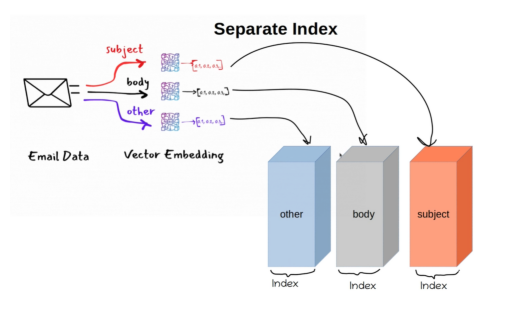

In [88]:
from PIL import Image
import matplotlib.pyplot as plt

# Abre la imagen
image = Image.open('Images/Partition_vectors.png')

# Muestra la imagen usando matplotlib
plt.imshow(image)
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()

In [89]:
# count of emails
dimensions = 3 # index dimension

emails_with_subject = 20
emails_with_body = 45
emails_with_other = 45

import numpy as np

# create vectors, assume embedded
# python list of lists
vects_subj= np.random.rand(emails_with_subject, dimensions).tolist()
vects_body= np.random.rand(emails_with_body, dimensions).tolist() 
vects_other= np.random.rand(emails_with_other, dimensions).tolist() 

# create ids for these vectors ,IDs are string

ids_subj = map(str, np.arange(emails_with_subject).tolist())
ids_body = map(str, np.arange(emails_with_body).tolist())
ids_other = map(str, np.arange(emails_with_other).tolist())

# zip id and vector
vectors_subj = list(zip(ids_subj, vects_subj)) # list of tuples (id, values)
vectors_body = list(zip(ids_body, vects_body) )
vectors_other = list(zip(ids_other, vects_other))


# upsert vectors into index with different namespace

idx.upsert(vectors_subj, namespace='subject')
idx.upsert(vectors_body, namespace='body')
idx.upsert(vectors_other) # default namespace is ""

{'upserted_count': 45}

In [91]:
idx.query(vector = list(np.random.rand(3)), 
          top_k=3, 
          namespace='', 
          include_values=True)

{'matches': [{'id': '11',
              'score': 0.983253062,
              'values': [0.725413561, 0.0447233841, 0.910733104]},
             {'id': '34',
              'score': 0.963501,
              'values': [0.723597407, 0.295190156, 0.867681265]},
             {'id': '38',
              'score': 0.944916,
              'values': [0.498129964, 0.34123373, 0.692297041]}],
 'namespace': '',
 'usage': {'read_units': 6}}